In [1]:
%pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 7.9 MB/s eta 0:00:00


In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/CS\ 182\ Final\ Project/

/content/drive/MyDrive/CS 182 Final Project


In [5]:
%cd Phase\ 2

/content/drive/MyDrive/CS 182 Final Project/Phase 2


In [14]:
train_losses = []
train_epochs = []
val_losses = []

def get_path(path):
  path += "/runs"
  i = os.listdir(path)[0]
  j = os.listdir(path + "/" + i)[0]
  return path + "/" + i + "/" + j



exp_names = ["gpt2-medium", "gpt2-xl", "llama3b"]
file_paths = ["./Milad/gpt2-medium_problem_writing_results", "./Milad/gpt2-xl_problem_writing_results", "./Milad/llama_3b_problem_writing_results"]



def plot_loss(exp_names, file_paths, train, val):
  for exp_name, file_path in zip(exp_names, file_paths):
    train_losses = []
    train_epochs = []
    val_losses = []
    for summary in summary_iterator(get_path(file_path)):
        for v in summary.summary.value:
          if v.tag == "train/loss":
            train_losses.append(v.simple_value)
          elif v.tag == "eval/loss":
            val_losses.append(v.simple_value)
          elif v.tag == "train/epoch":
            train_epochs.append(v.simple_value)

    train_losses = np.array(train_losses)
    val_losses =  np.array(val_losses)
    train_epochs = np.array(train_epochs)

    if train:
      plt.plot(train_epochs[::2][:-1], train_losses, label=exp_name)
    if val:
      plt.plot(train_epochs[::2][:-1], val_losses, label=exp_name+"val")
    # display(pd.DataFrame({"train_losses": train_losses, "val_losses": val_losses}))
  plt.legend()
  plt.xlabel("Training Epochs")
  plt.ylabel("Cross Entropy Loss")
  plt.title("Problem Writing Validation Loss")
  plt.show()

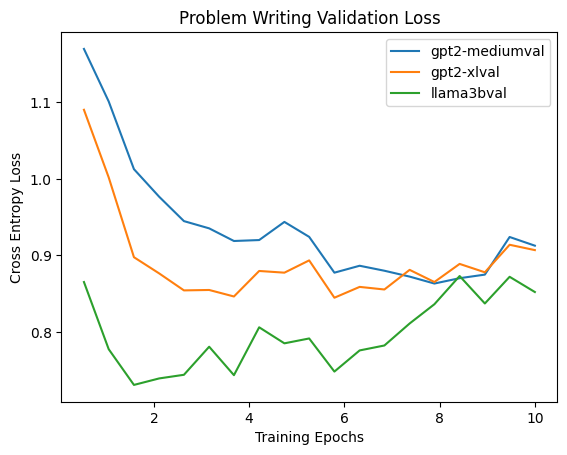

In [15]:
plot_loss(exp_names, file_paths, train=False, val=True)

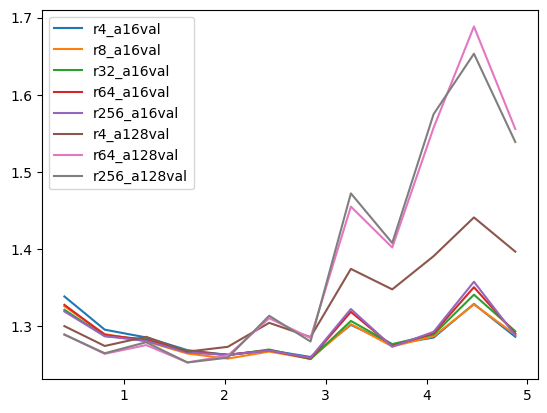

In [ ]:
plot_loss(exp_names, file_paths, train=False, val=True)